Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/12
8/8 [==============================] - 48s 6s/step - loss: 0.7813 - acc: 0.5295 - val_loss: 0.6534 - val_acc: 0.5820
Epoch 2/12
8/8 [==============================] - 58s 7s/step - loss: 0.7366 - acc: 0.6553 - val_loss: 0.6405 - val_acc: 0.6602
Epoch 3/12
8/8 [==============================] - 50s 6s/step - loss: 0.5492 - acc: 0.7475 - val_loss: 1.0088 - val_acc: 0.7891
Epoch 4/12
8/8 [==============================] - 47s 6s/step - loss: 1.6158 - acc: 0.8902 - val_loss: 1.4980 - val_acc: 0.7461
Epoch 5/12
8/8 [==============================] - 63s 8s/step - loss: 0.2154 - acc: 0.9102 - val_loss: 1.5855 - val_acc: 0.7773
Epoch 6/12
8/8 [==============================] - 46s 6s/step - loss: 0.1466 - acc: 0.9289 - val_loss: 1.7062 - val_acc: 0.7852
Epoch 7/12
8/8 [==============================] - 50s 6s/step - loss: 0.0782 - acc: 0.9633 - val_loss: 1.3715 - val_acc: 0.8203
Epoch 8/12
8/8 [=====

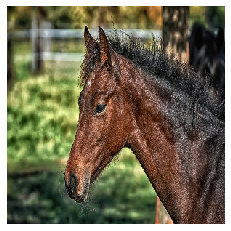

lady.jpg is a human


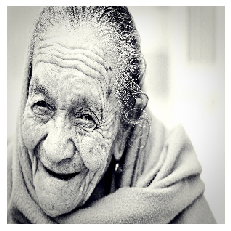

In [16]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import numpy as np
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt

# Open zipped files
local_zip = 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('horse-or-human')
local_zip = 'validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('validation-horse-or-human')
zip_ref.close()

# Directory with training horse pictures
train_horse_dir = os.path.join('horse-or-human/horses')
train_horse_names = os.listdir(train_horse_dir)

# Directory with training human pictures
train_human_dir = os.path.join('horse-or-human/humans')
train_human_names = os.listdir(train_human_dir)

# Directory with training horse pictures
validation_horse_dir = os.path.join('validation-horse-or-human/horses')
validation_horse_hames = os.listdir(validation_horse_dir)

# Directory with training human pictures
validation_human_dir = os.path.join('validation-horse-or-human/humans')
validation_human_names = os.listdir(validation_human_dir)

# Building the model
model = tf.keras.models.Sequential([
    # This first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 1 output neuron contains value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model 
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

# Rescale images by 1./255 for normalization
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Data Preprocessing
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'horse-or-human',  
        target_size=(300, 300),  # Images resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'validation-horse-or-human',  
        target_size=(300, 300),  
        batch_size=32,
        class_mode='binary')

# Training/fitting the images
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=12,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

print(" ")
print("-----------------PREDICTING IMAGES----------------------")
print(" ")
# predicting images

file = 'Guess'
predicting_img = os.listdir(file)

for pics in predicting_img:
    path = 'Guess/' + pics
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    if classes[0]>0.5:
        print(pics + " is a human")
    else:
        print(pics + " is a horse")
    plt.axis('off')
    plt.imshow(img)
    plt.show(img)